# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
print(city_url)
city_weather = requests.get(city_url).json()
pprint(city_weather)
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']
city_max_temp

https://api.openweathermap.org/data/2.5/weather?q=bethel&appid=dd22109048d7d9b43869fb5db13be3f5&units=metric
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 41.3712, 'lon': -73.414},
 'dt': 1724536902,
 'id': 5282297,
 'main': {'feels_like': 25.88,
          'grnd_level': 1002,
          'humidity': 65,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 25.57,
          'temp_max': 26.99,
          'temp_min': 23.74},
 'name': 'Bethel',
 'sys': {'country': 'US',
         'id': 2093006,
         'sunrise': 1724494351,
         'sunset': 1724542780,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'gust': 2.17, 'speed': 1.63}}


26.99

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yerofey pavlovich
Processing Record 2 of Set 1 | sydney mines
Processing Record 3 of Set 1 | bokhan
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | kroya
Processing Record 6 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | novoanninskiy
Processing Record 10 of Set 1 | qalat
Processing Record 11 of Set 1 | luanda
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | fort bragg
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | chandler
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | dunedin
Processing Recor

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd. DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yerofey pavlovich,53.9667,121.9667,13.45,99,100,2.13,RU,1724539948
1,sydney mines,46.2367,-60.2177,21.84,72,28,4.02,CA,1724539949
2,bokhan,53.1530,103.7714,13.59,72,20,2.20,RU,1724539950
3,edinburgh of the seven seas,-37.0676,-12.3116,14.35,90,100,17.31,SH,1724539951
4,kroya,-7.6331,109.2461,24.13,88,75,1.70,ID,1724539952


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yerofey pavlovich,53.9667,121.9667,13.45,99,100,2.13,RU,1724539948
1,sydney mines,46.2367,-60.2177,21.84,72,28,4.02,CA,1724539949
2,bokhan,53.1530,103.7714,13.59,72,20,2.20,RU,1724539950
3,edinburgh of the seven seas,-37.0676,-12.3116,14.35,90,100,17.31,SH,1724539951
4,kroya,-7.6331,109.2461,24.13,88,75,1.70,ID,1724539952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

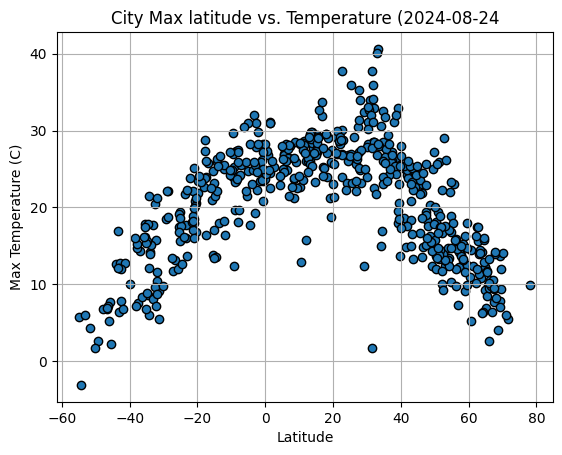

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max latitude vs. Temperature (2024-08-24")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

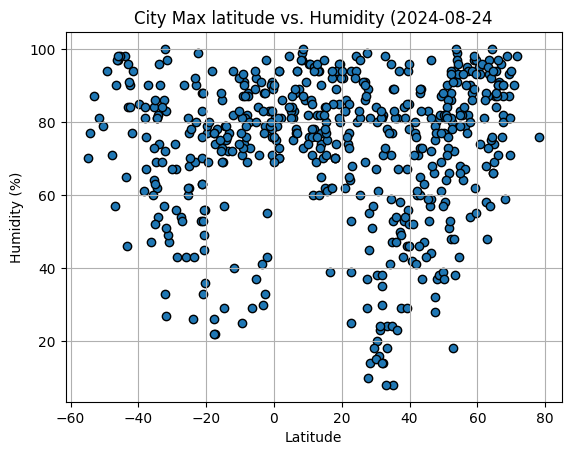

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max latitude vs. Humidity (2024-08-24")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

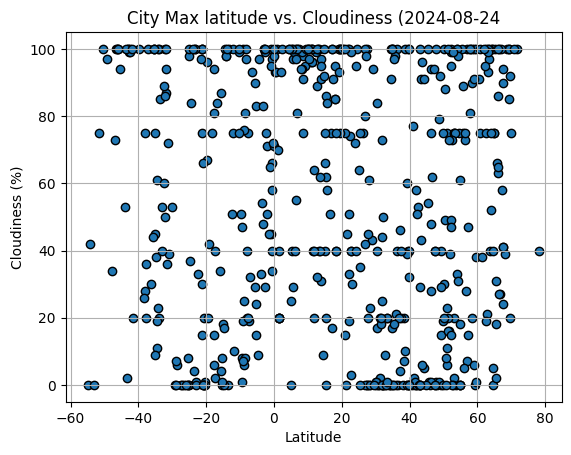

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max latitude vs. Cloudiness (2024-08-24")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

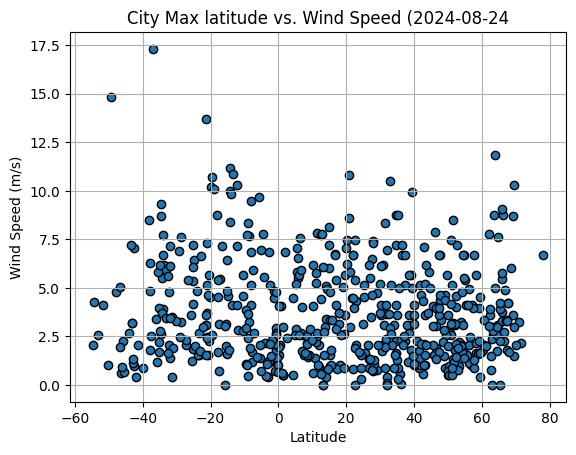

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max latitude vs. Wind Speed (2024-08-24")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, title, x_label, y_label, line_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r")
    print(f'The r^2-value is: {r_value}')
    plt.annotate(line_eq, line_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yerofey pavlovich,53.9667,121.9667,13.45,99,100,2.13,RU,1724539948
1,sydney mines,46.2367,-60.2177,21.84,72,28,4.02,CA,1724539949
2,bokhan,53.1530,103.7714,13.59,72,20,2.20,RU,1724539950
5,albany,42.6001,-73.9662,24.69,71,53,0.58,US,1724539955
6,udachny,66.4167,112.4000,10.56,91,100,8.75,RU,1724539956


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,14.35,90,100,17.31,SH,1724539951
4,kroya,-7.6331,109.2461,24.13,88,75,1.70,ID,1724539952
9,luanda,-8.8368,13.2343,19.71,91,25,2.44,AO,1724539944
10,adamstown,-25.0660,-130.1015,19.42,68,98,5.34,PN,1724539960
12,chonchi,-42.6128,-73.8092,7.84,90,100,0.99,CL,1724539962


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.7330740827509492


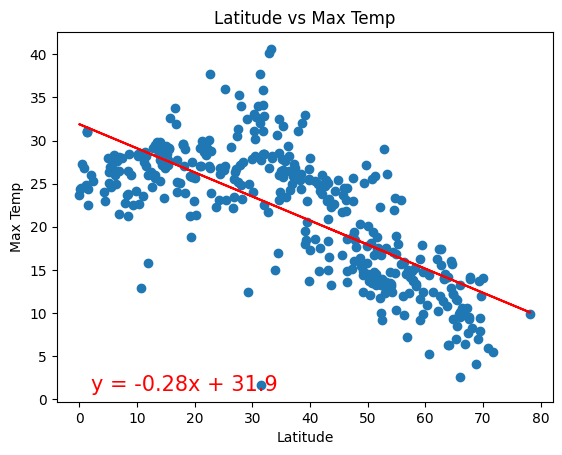

In [64]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
#plt.title(f"Latitude vs Max Temp")
linear_regression(x, y, "Latitude vs Max Temp", "Latitude", "Max Temp", (2,1))

The r^2-value is: 0.8347801286023311


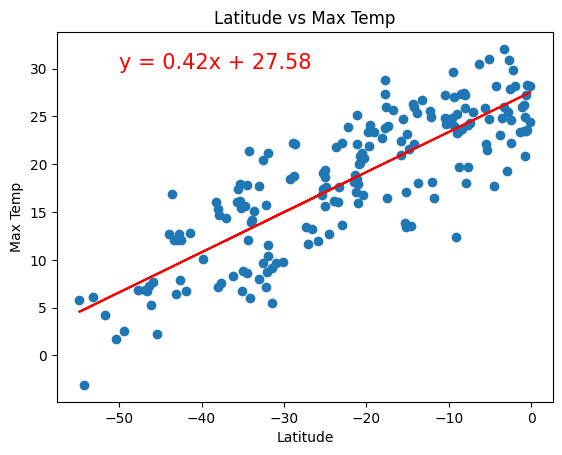

In [65]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
#plt.title(f"Latitude vs Max Temp")
linear_regression(x, y, "Latitude vs Max Temp", "Latitude", "Max Temp", (-50,30))

**Discussion about the linear relationship:** Based on the linear regression plots we can see that there is a negative correlation between latitude and maximum temperature for the northern hemisphere, while for the southern hemisphere there is a posistive correlation between max temperature and latitude. The lines have a decent amount of correlation based on the r-values of -0.73 and 0.83. The southern hemisphere demostrates a higher positive correlation than the negative correlation of the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00954033527781853


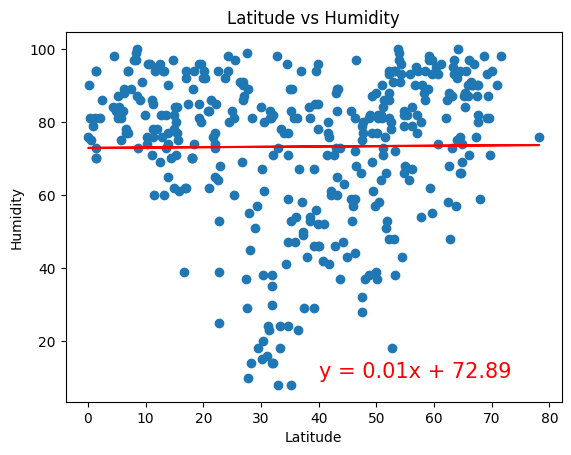

In [66]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
#plt.title(f"Latitude vs Humidity")
linear_regression(x, y, "Latitude vs Humidity", "Latitude", "Humidity", (40,10))

The r^2-value is: -0.05402008220019159


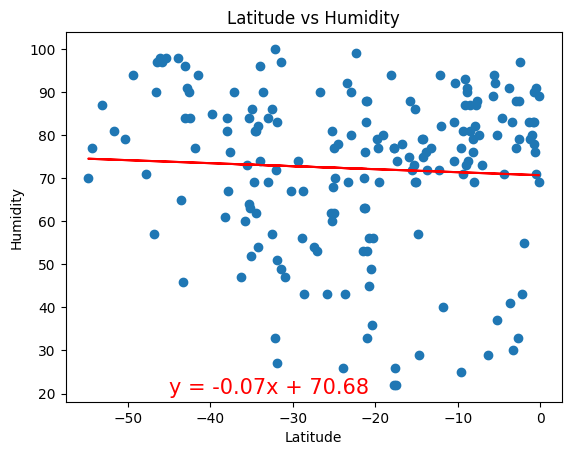

In [67]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
#plt.title(f"Latitude vs Humidity")
linear_regression(x, y, "Latitude vs Humidity", "Latitude", "Humidity", (-45,20))

**Discussion about the linear relationship:** Humidity seemingly demonstrates no correlation in change of latitude based on the r-values numbers being far from 1.00, at -0.05 and 0.009. Therefore we can say there is no correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.12698336965449594


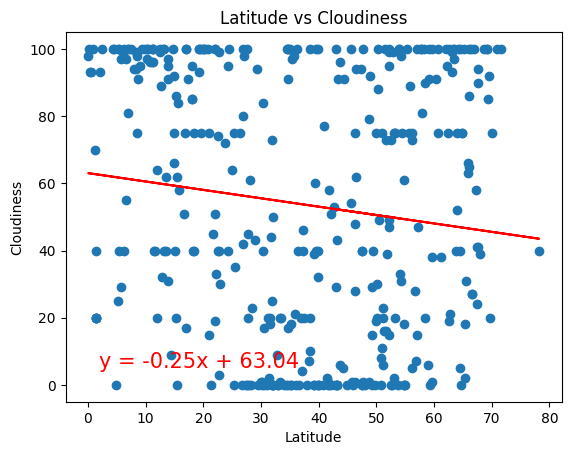

In [68]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
#plt.title(f"Latitude vs Cloudiness")
linear_regression(x, y, "Latitude vs Cloudiness", "Latitude", "Cloudiness", (2,5))

The r^2-value is: -0.05635655983631862


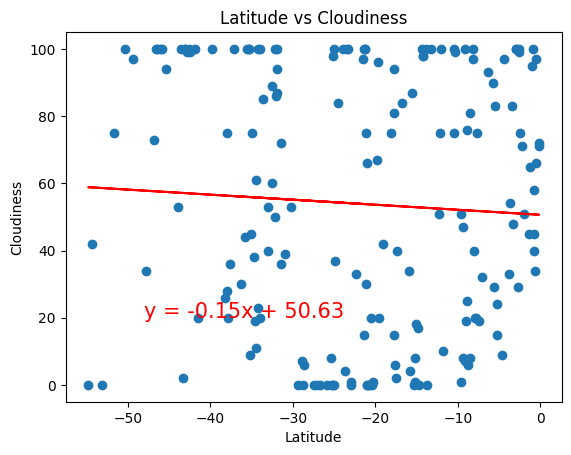

In [69]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
#plt.title(f"Latitude vs Cloudiness")
linear_regression(x, y, "Latitude vs Cloudiness", "Latitude", "Cloudiness", (-48,20))

**Discussion about the linear relationship:** Much like the humidity, there is no positive or negative correlation to be gleemed from the relationship of latitude and cloudiness. One could see potential in a negative correlation, but it is low to non existent at best with r-values of -0.05 and -0.12.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.014281835326743233


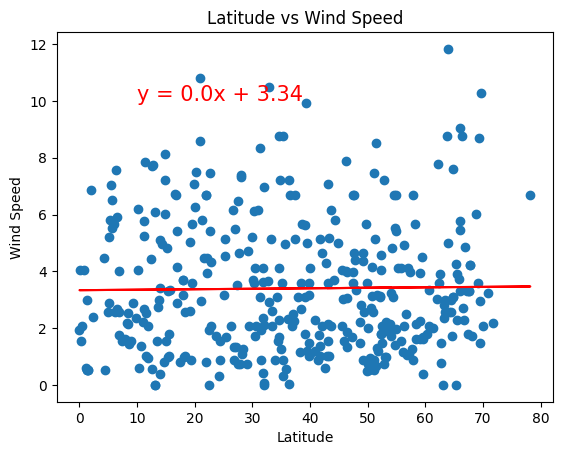

In [70]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
#plt.title(f"Latitude vs Wind Speed")
linear_regression(x, y, "Latitude vs Wind Speed", "Latitude", "Wind Speed", (10,10))

The r^2-value is: -0.04113570991670282


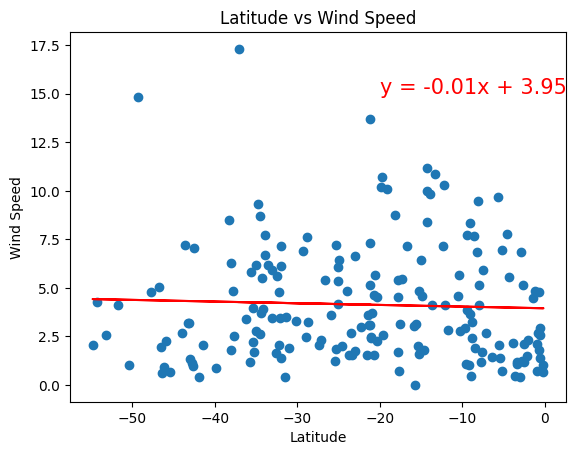

In [71]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
#plt.title(f"Latitude vs Wind Speed")
linear_regression(x, y, "Latitude vs Wind Speed", "Latitude", "Wind Speed", (-20,15))

**Discussion about the linear relationship:** Much like the past two linear regressions done for the northern and southern hemisphere, there can be no correlation gleemed from the data for latitude vs wind speed. The r-values for both hemispheres show 0.014 and -0.04 correlation between the two. Too low to be claiming a strong correlation.